## Récupération des données 

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import missingno as msno
%matplotlib inline
import seaborn as sns 
pd.set_option("display.max_columns",500)
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as st
from sklearn.preprocessing import  StandardScaler
from scipy import stats
from sklearn.decomposition import PCA

In [3]:
dataf = pd.read_csv('dataf.csv')

In [4]:
# On renome les colonnes : remplacer - par _
dataf.rename(columns={'energy-kcal_100g': 'energy_kcal_100g','saturated-fat_100g':'saturated_fat_100g','trans-fat_100g':'trans_fat_100g'}, inplace=True)

In [5]:
dataf.dtypes

code                    int64
nutriscore_score      float64
nutriscore_grade       object
countries              object
energy_kcal_100g      float64
fat_100g              float64
saturated_fat_100g    float64
trans_fat_100g        float64
proteins_100g         float64
salt_100g             float64
fiber_100g            float64
sugars_100g           float64
main_category_en       object
dtype: object

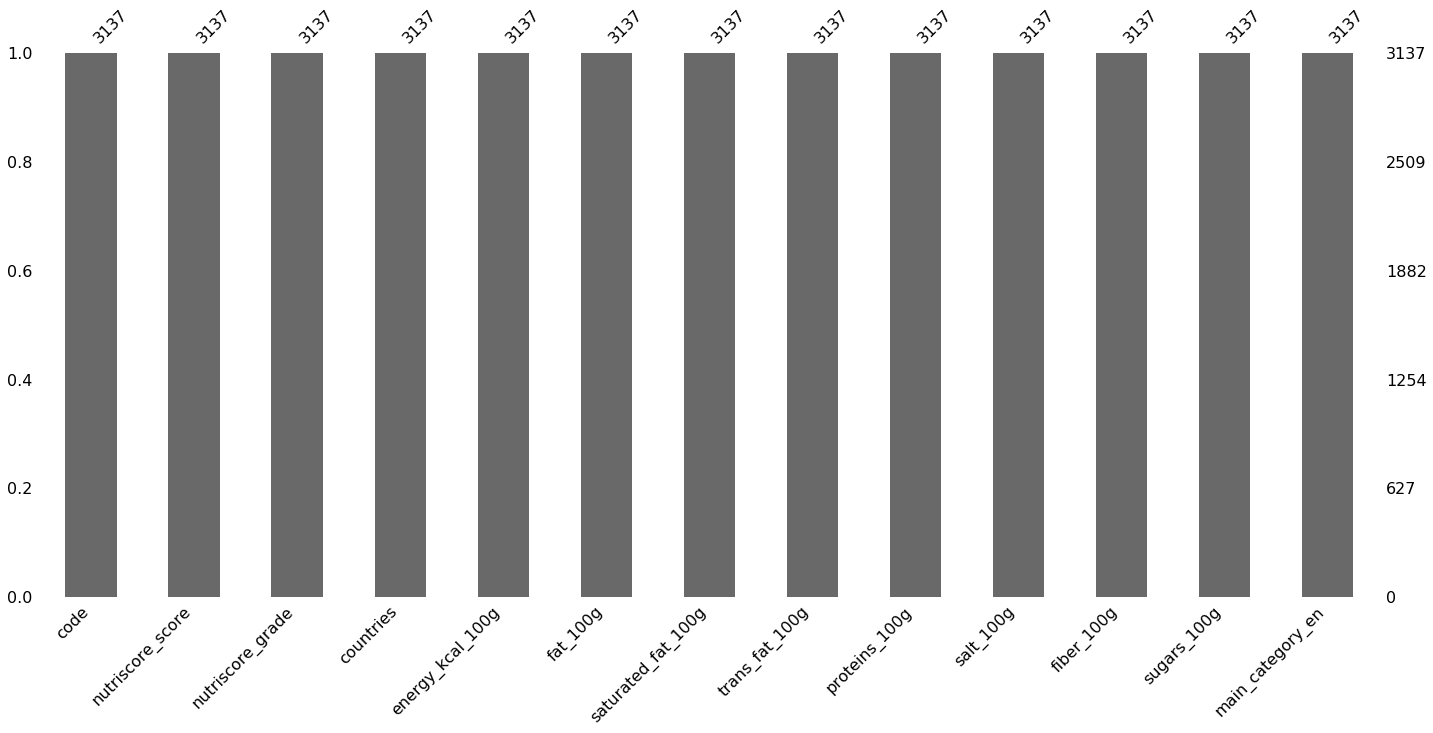

In [155]:
msno.bar(dataf)

In [34]:
dataf.columns

Index(['code', 'nutriscore_score', 'nutriscore_grade', 'countries',
       'energy_kcal_100g', 'fat_100g', 'saturated_fat_100g', 'trans_fat_100g',
       'proteins_100g', 'salt_100g', 'fiber_100g', 'sugars_100g',
       'main_category_en'],
      dtype='object')

In [35]:
dataf.head(4)

code  nutriscore_score nutriscore_grade              countries  \
0  790310075              13.0                d  france, united states   
1      14878              -1.0                a  france, united states   
2      14892              -1.0                a  france, united states   
3      16063               3.0                c  états-unis, en:france   

   energy_kcal_100g  fat_100g  saturated_fat_100g  trans_fat_100g  \
0             300.0      0.00                0.00             0.0   
1             570.0     48.00                7.50             0.0   
2             594.0     50.00                7.81             0.0   
3              66.0      1.64                0.00             0.0   

   proteins_100g  salt_100g  fiber_100g  sugars_100g main_category_en  
0           7.50      0.125         0.0        52.50    non renseigné  
1          21.00      0.000         9.4         3.00    non renseigné  
2          21.88      0.000         9.4         3.12    non renseigné  
3           4.10      1.230         0.8         0.82    non renseigné

##### Diagramme à secteurs pour les variables  dataf

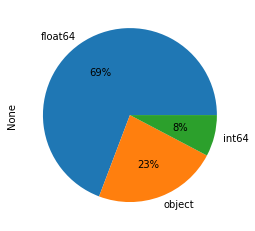

In [95]:
dataf.dtypes.value_counts().plot.pie(autopct='%1.0f%%')

 69% des variables sont de type float 

##### Histogramme et densite pour chaque variable   de dataf

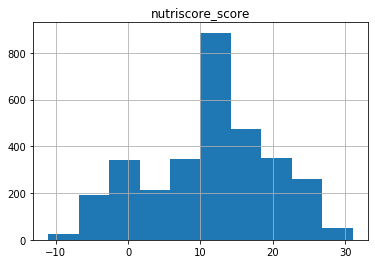

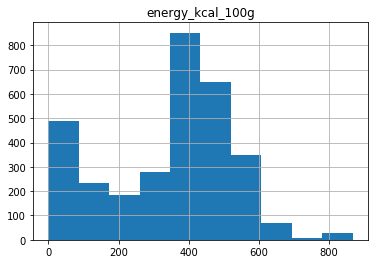

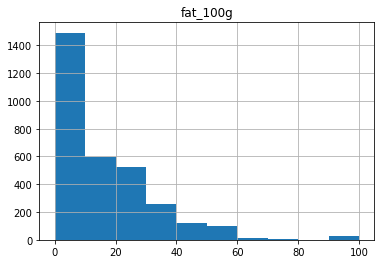

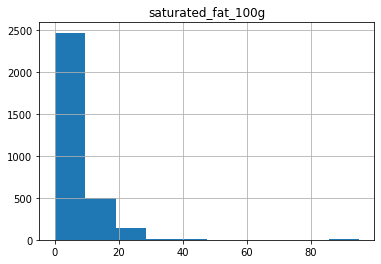

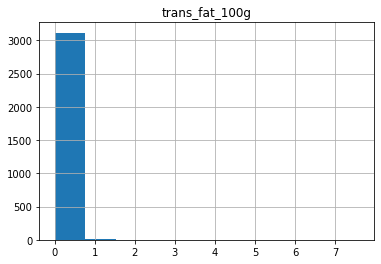

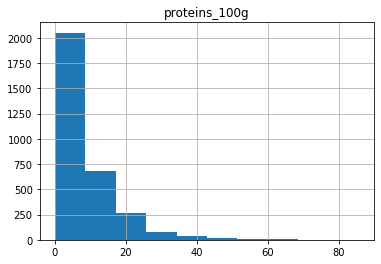

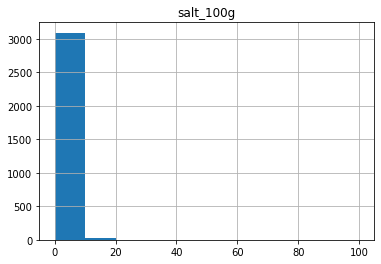

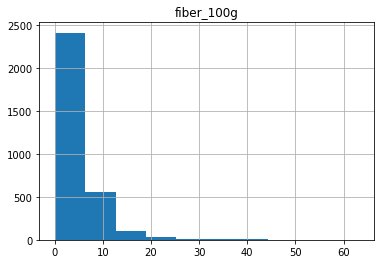

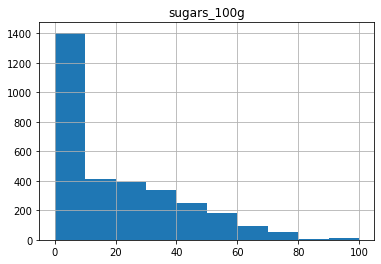

In [37]:
for col in dataf.select_dtypes('float'):
    dataf.hist(col)

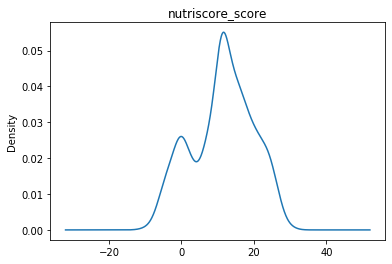

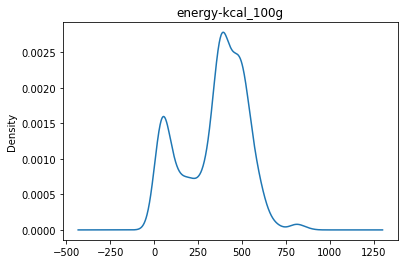

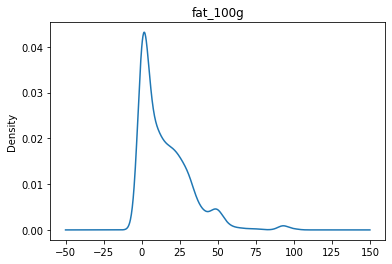

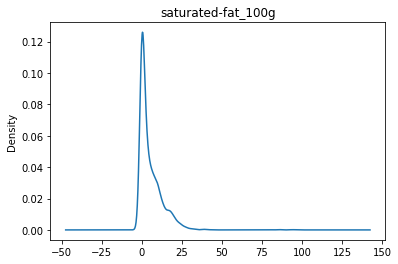

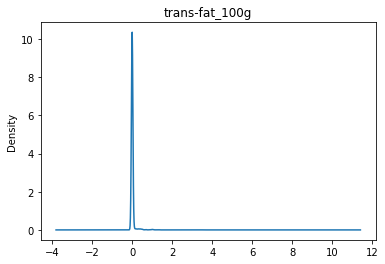

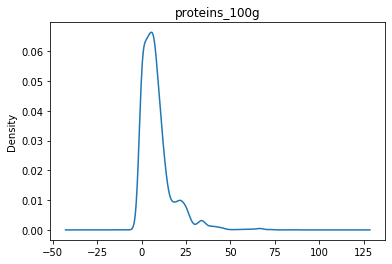

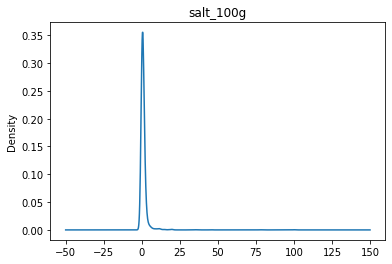

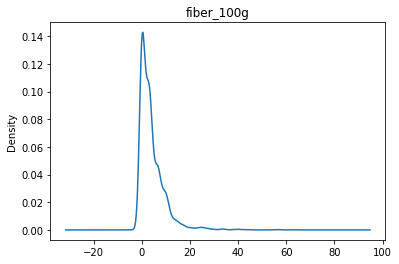

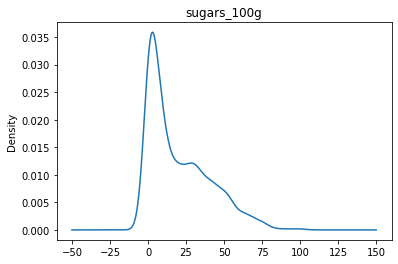

In [8]:
for col in dataf.select_dtypes('float'):
     plt.figure()
     plt.title(col)   
     dataf[col].plot.kde()   

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

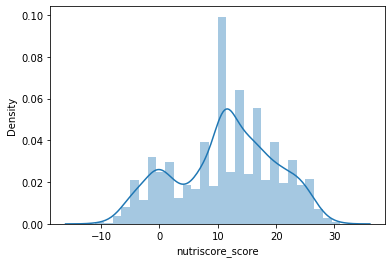

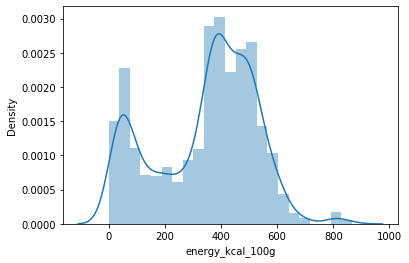

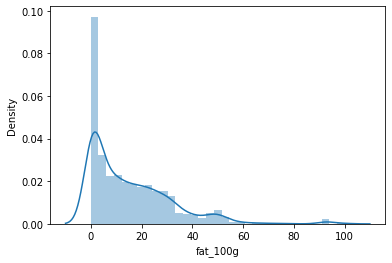

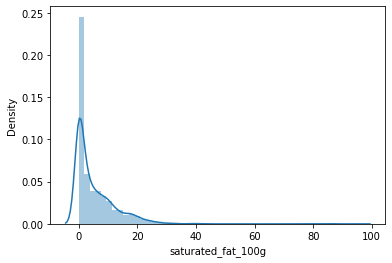

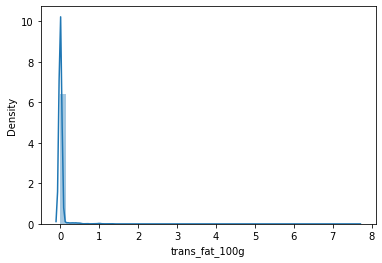

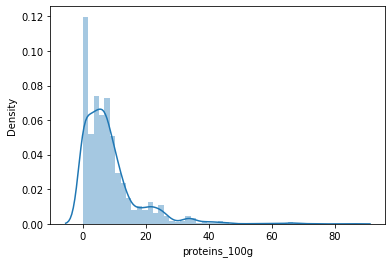

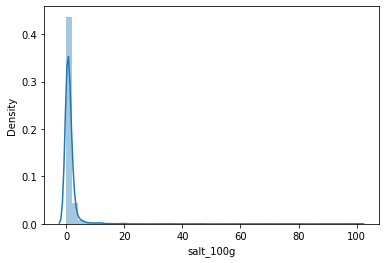

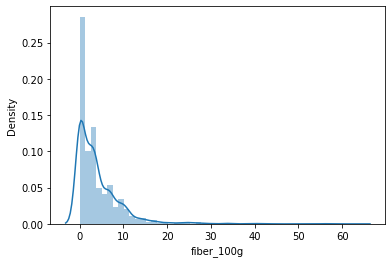

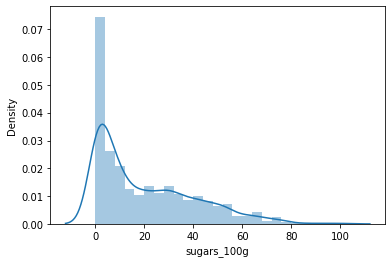

In [38]:
for col in dataf.select_dtypes('float'):
  plt.figure()
  sns.distplot(dataf[col],kde=True) 

###### Distribution normale  pour  tous les variables de type float 

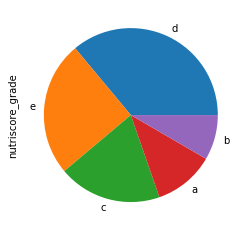

In [10]:
 dataf['nutriscore_grade'].value_counts().plot.pie()

In [11]:
dataf['nutriscore_grade'].value_counts(normalize=True)

d    0.360536
e    0.250877
c    0.191903
a    0.112847
b    0.083838
Name: nutriscore_grade, dtype: float64

La grade  d  est  presente par rapport {a,b,c,e}

#### Visualisation des données: relation  entre  les variables 

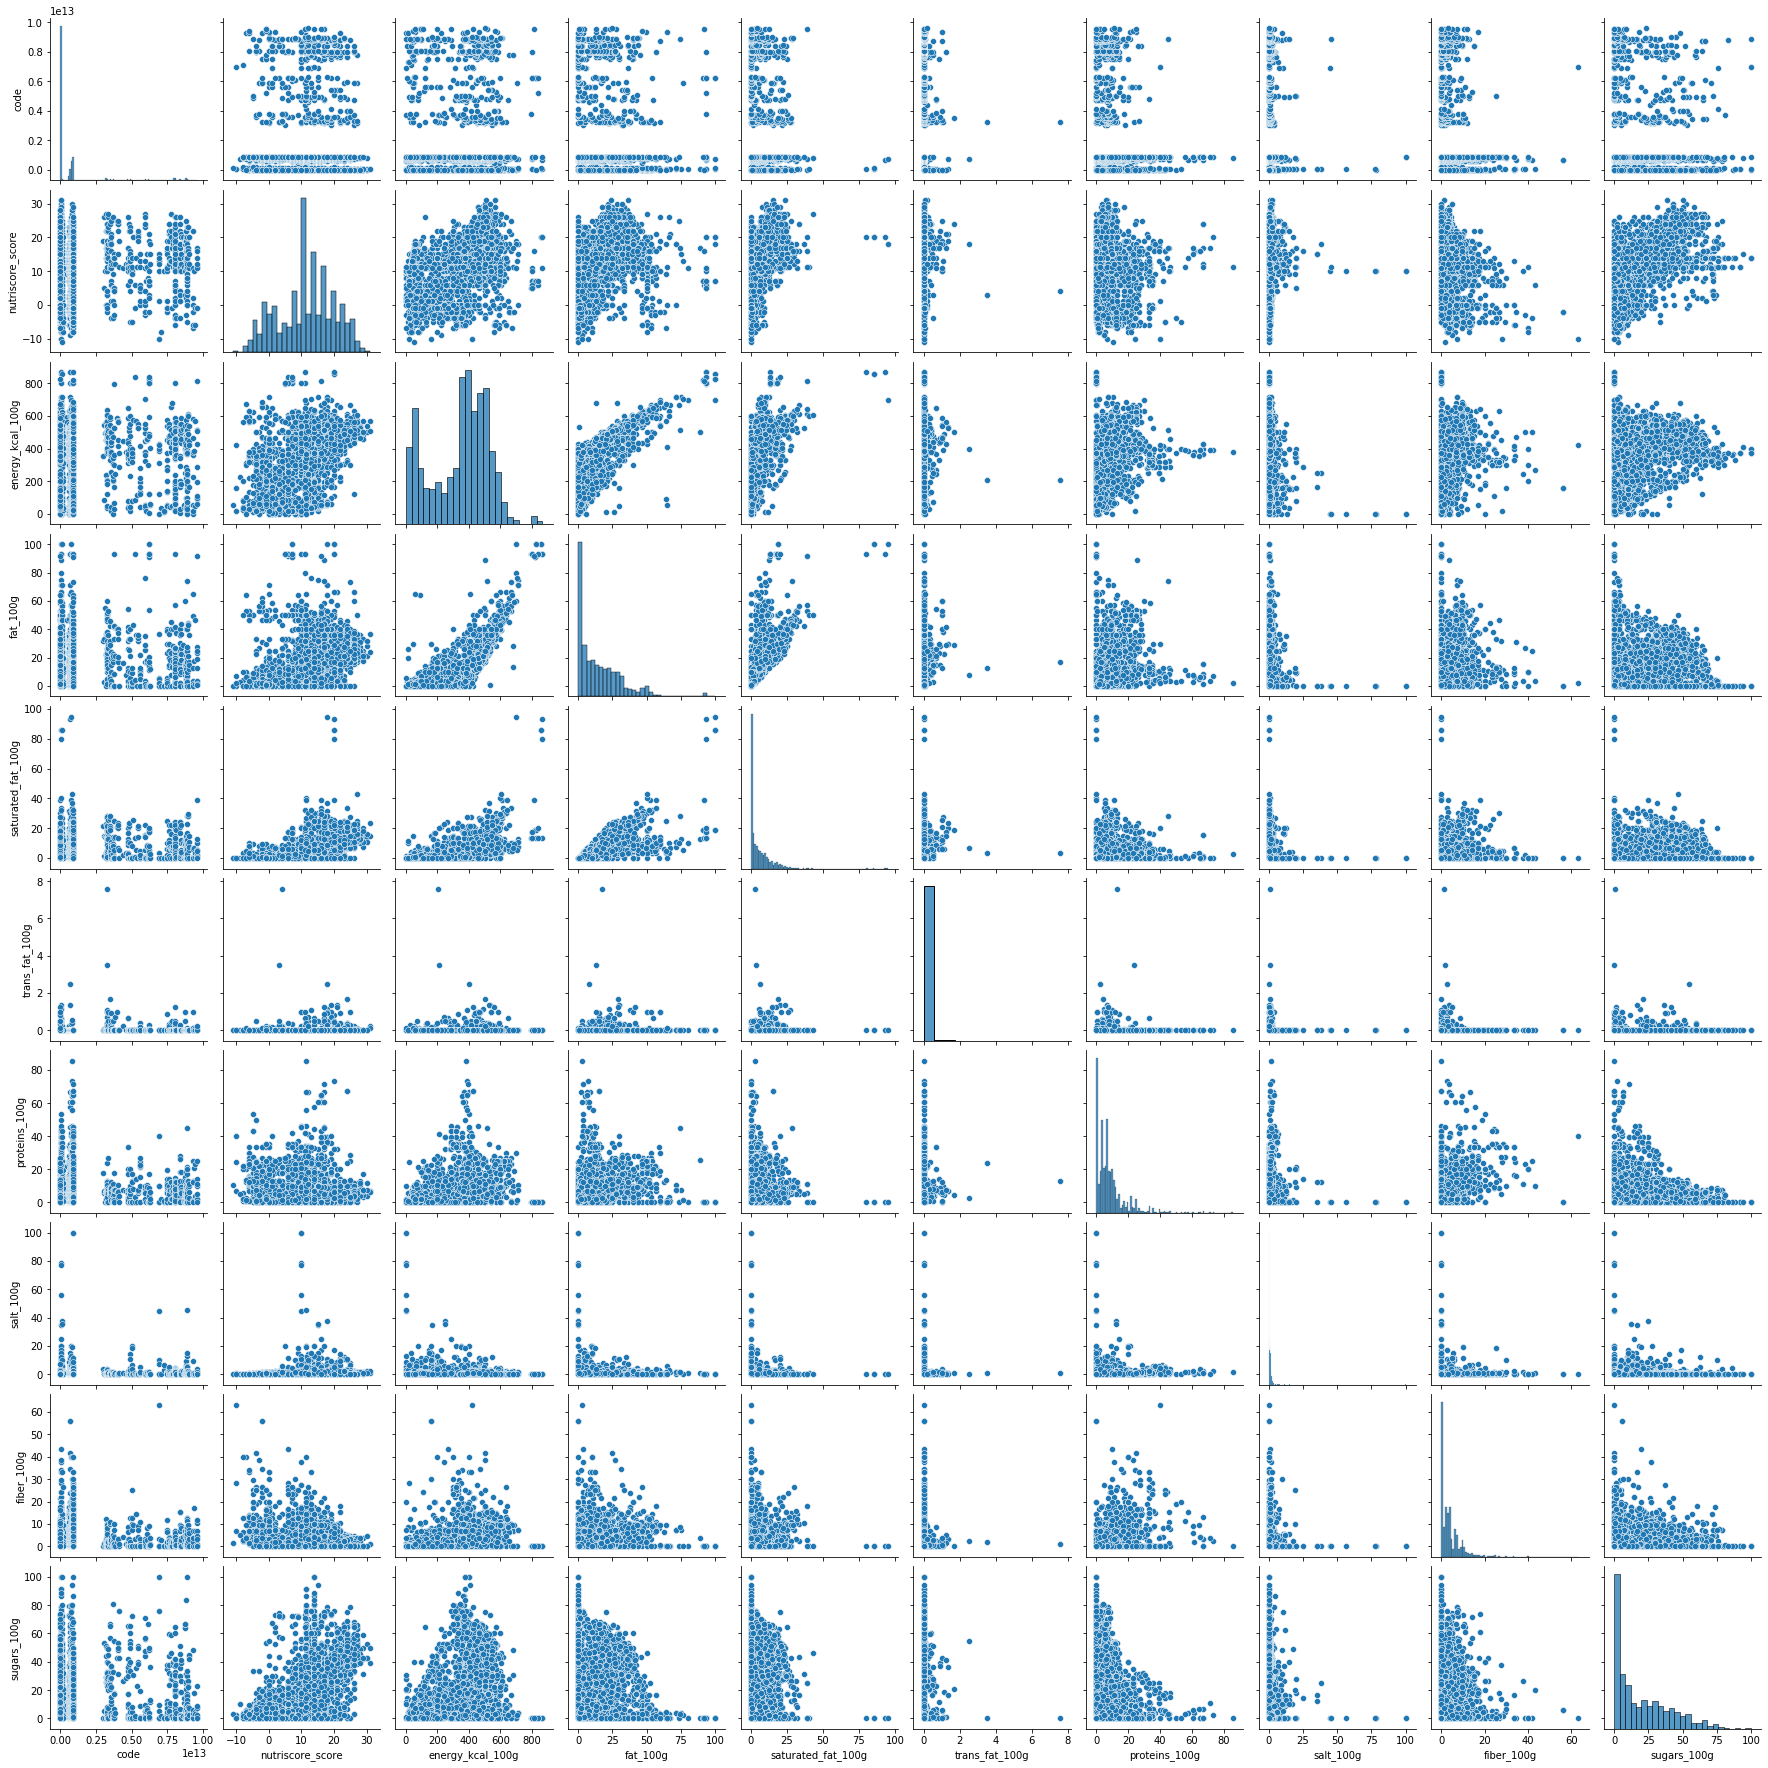

In [39]:
sns.pairplot(dataf)

#### Visualisation des données  en  fonction  de la variable nutriscore_grade

<Figure size 432x288 with 0 Axes>

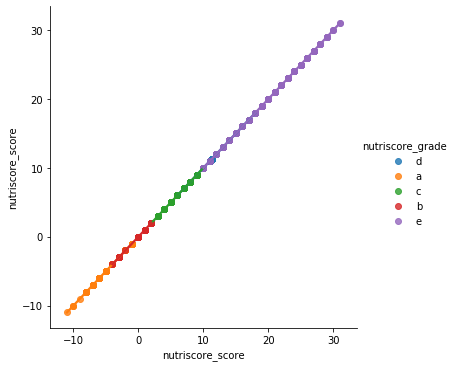

<Figure size 432x288 with 0 Axes>

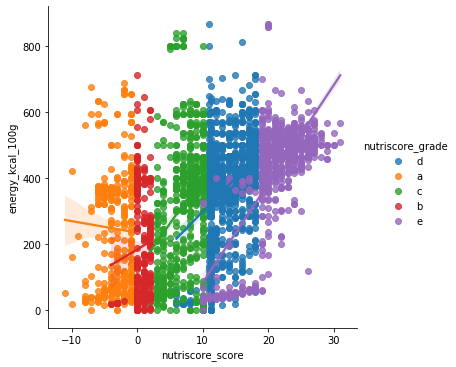

<Figure size 432x288 with 0 Axes>

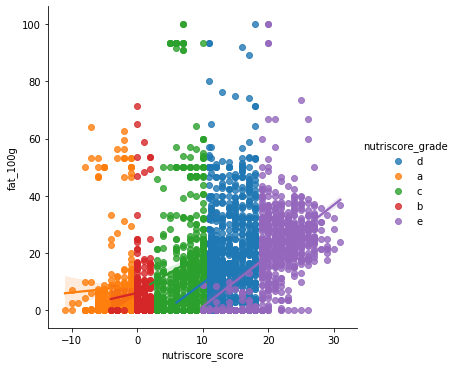

<Figure size 432x288 with 0 Axes>

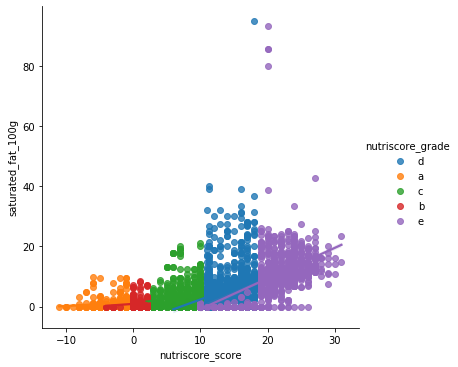

<Figure size 432x288 with 0 Axes>

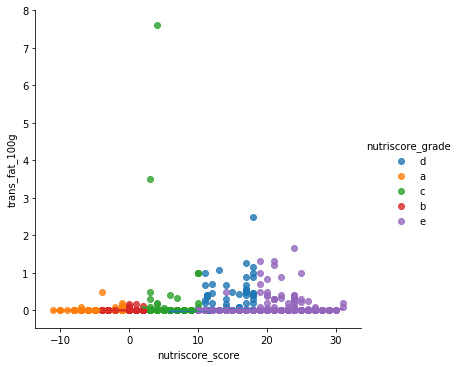

<Figure size 432x288 with 0 Axes>

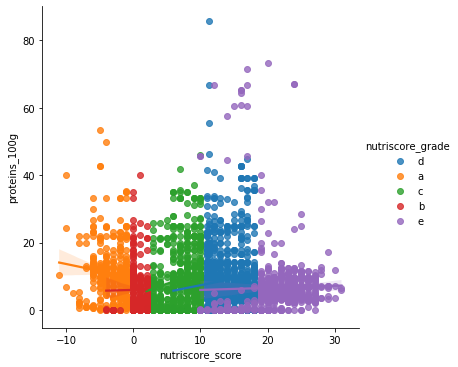

<Figure size 432x288 with 0 Axes>

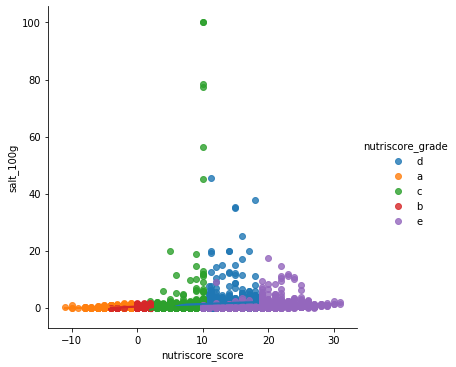

<Figure size 432x288 with 0 Axes>

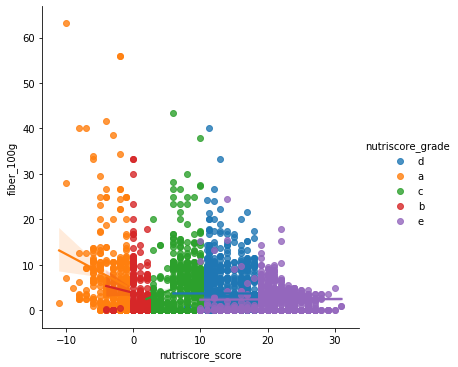

<Figure size 432x288 with 0 Axes>

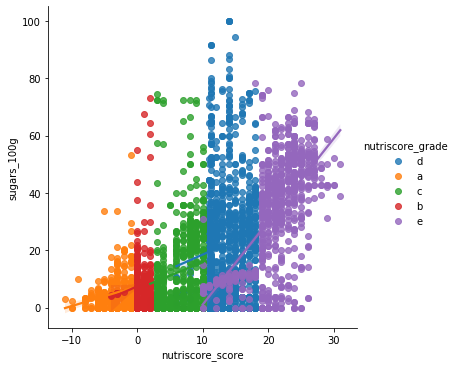

In [40]:
for  col in dataf.select_dtypes('float'):
    plt.figure()
    sns.lmplot(x='nutriscore_score',y=col,hue='nutriscore_grade',data=dataf)

Plusieurs données ne sont pas proche de la droite lineaire 

#### Matrice de corrélation   

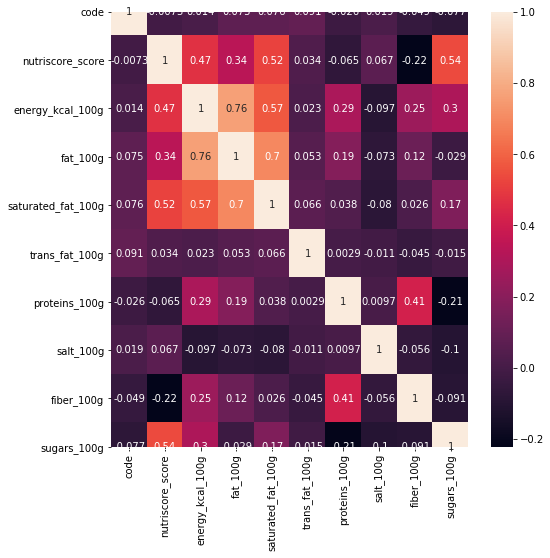

In [41]:
fig,aa=plt.subplots(figsize=(8,8))
sns.heatmap(dataf.corr(),annot=True,ax=aa)

Corrélation  significative  entre energy-kcal_100g et  fat_100g 

#### Boxplot dataf 

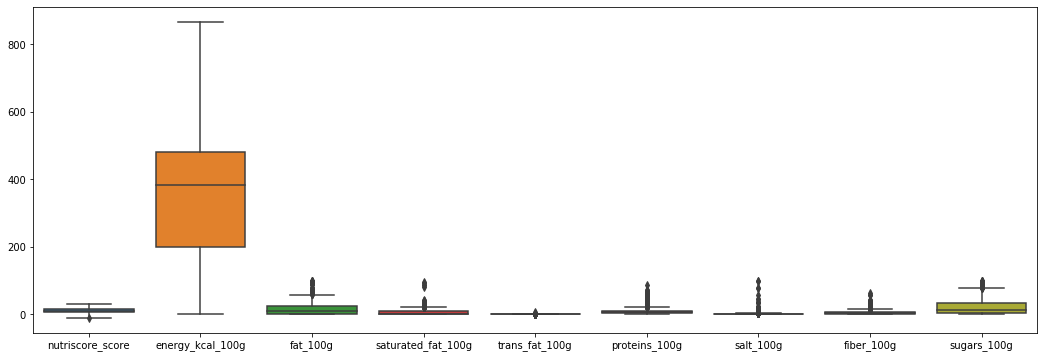

In [8]:
fig,aa=plt.subplots(figsize=(18,6))
sns.boxplot(data=dataf.loc[:,['nutriscore_score', 'energy_kcal_100g', 'fat_100g', 'saturated_fat_100g','trans_fat_100g', 'proteins_100g', 'salt_100g', 'fiber_100g','sugars_100g']],ax=aa)

#### Boxplot pour chaque  variable  en fobction de la grade nutriscore_grade

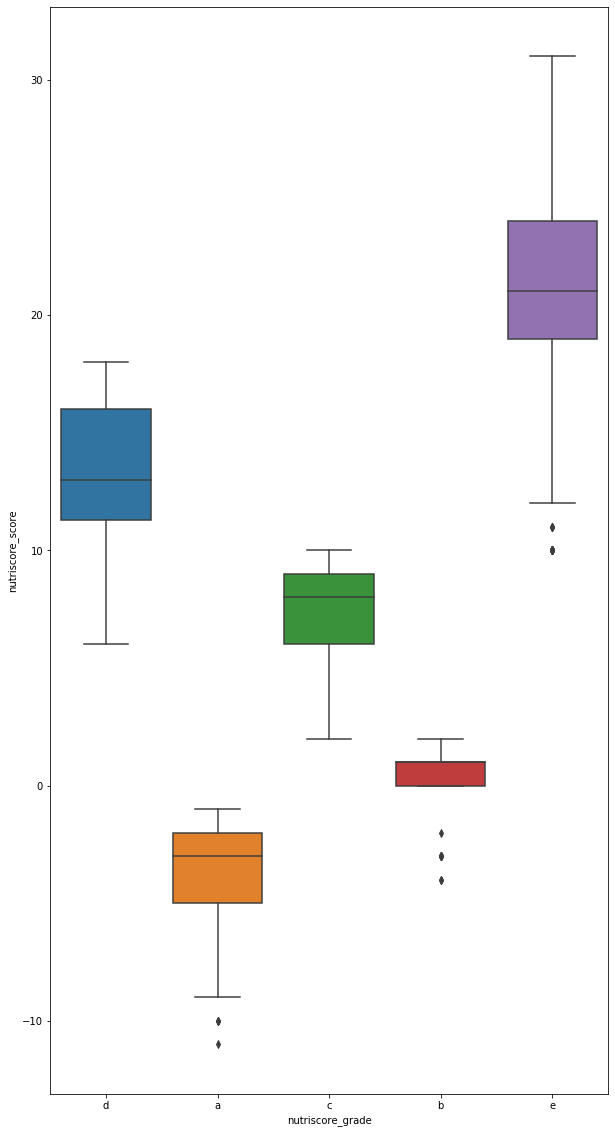

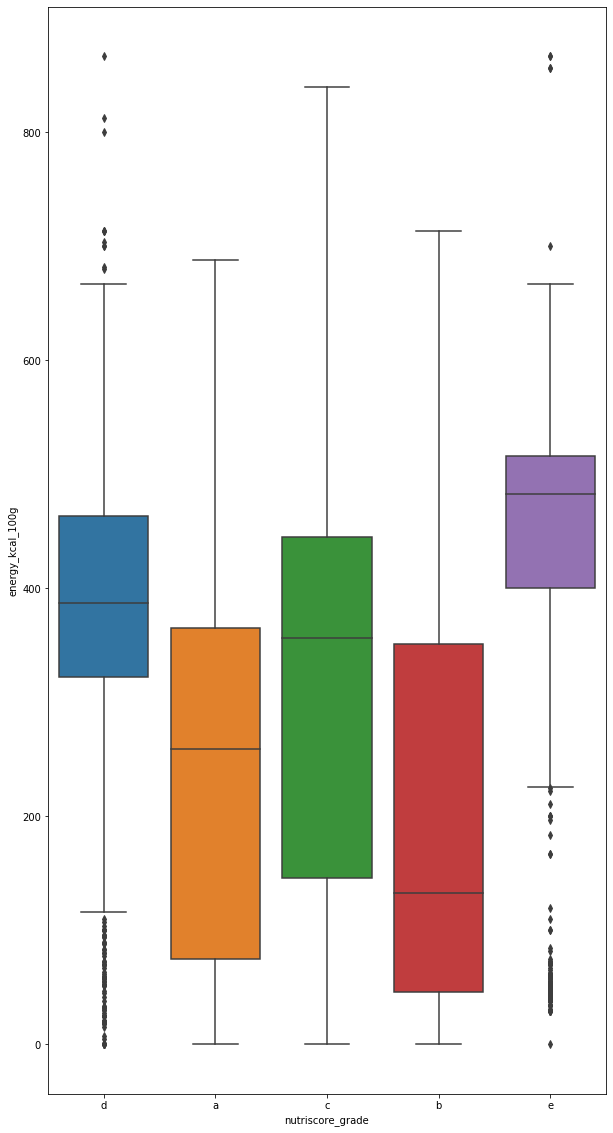

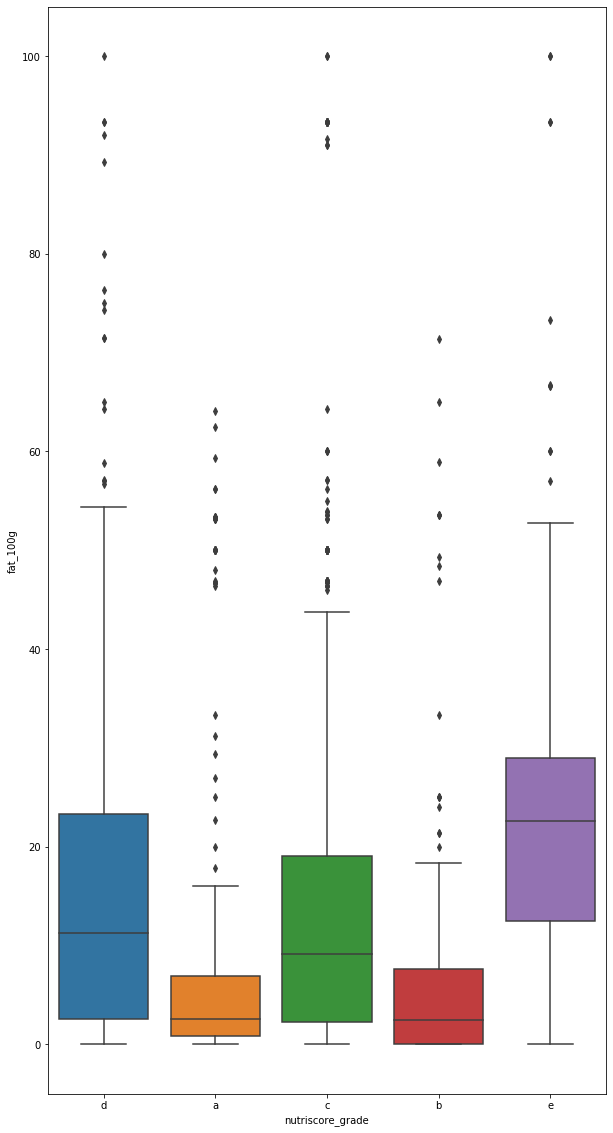

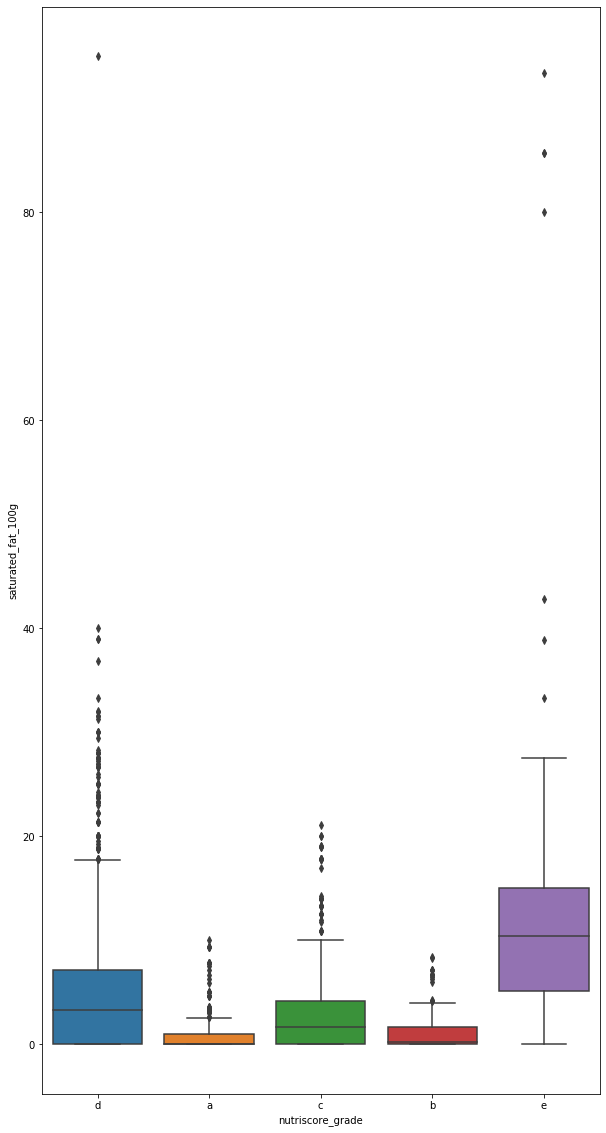

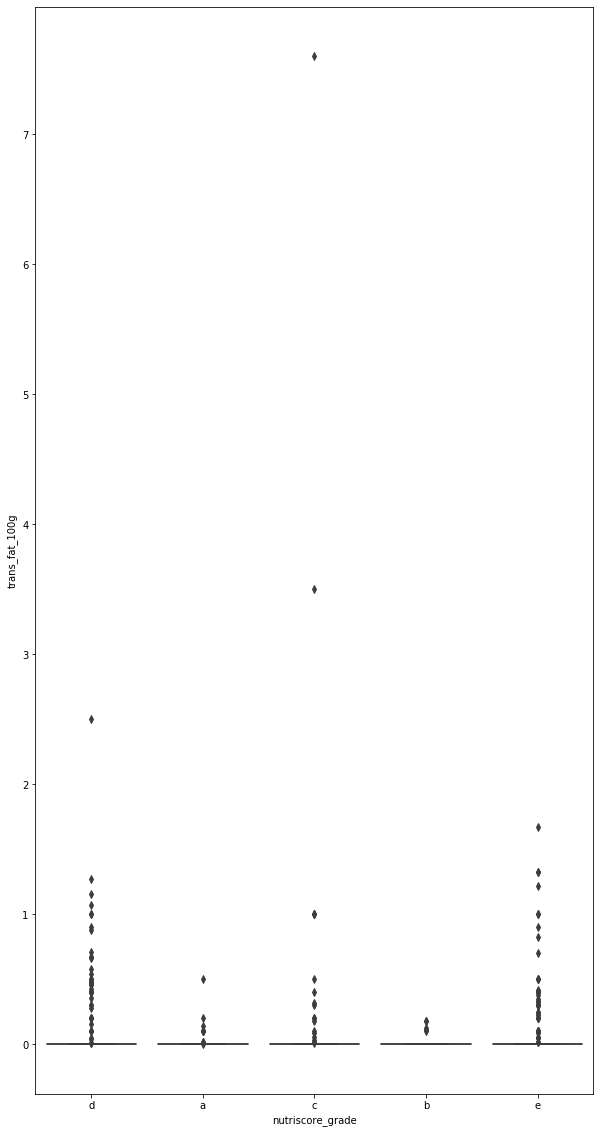

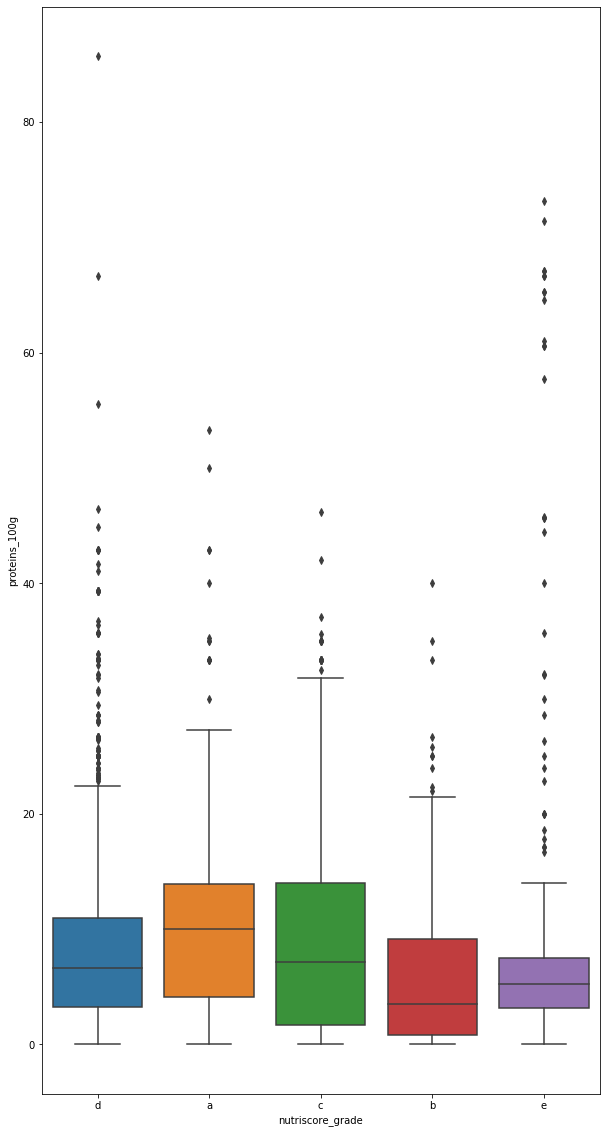

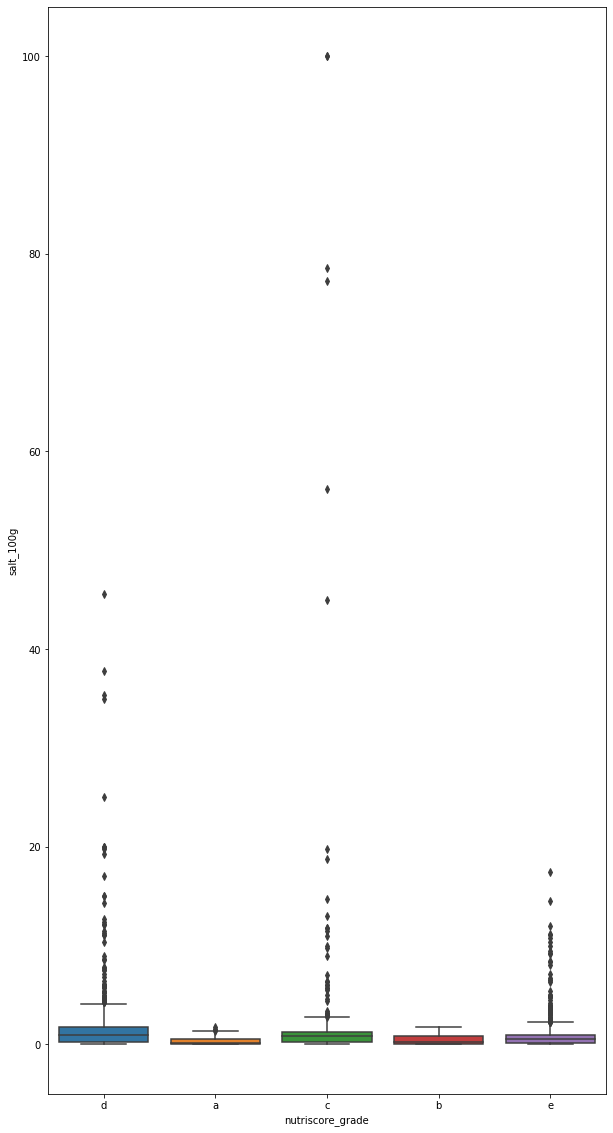

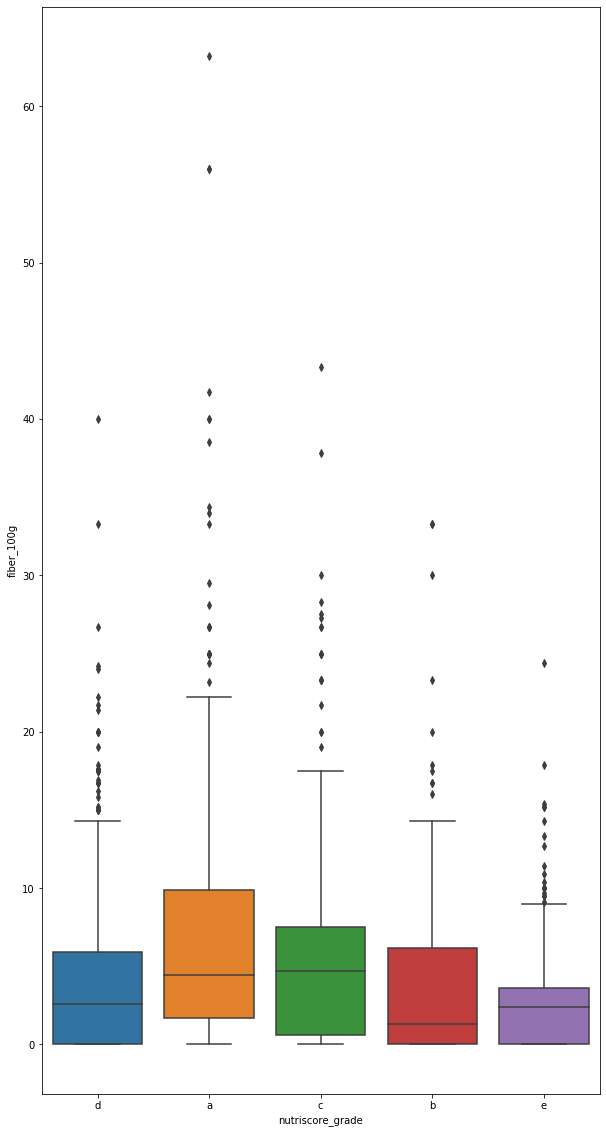

In [43]:
for  col in  dataf.select_dtypes('float'):
    fig,aa=plt.subplots(figsize=(10,20))
    sns.boxplot(data = dataf , x = 'nutriscore_grade' , y = col,ax=aa )

# Test de corrélation  entre les variables

### Les hypothèses  sont:
#### H0  « les  variables testées sont indépendantes »(ρ = 0)
#### H1  « les  variables testées ne sont pas  indépendantes »(ρ ≠ 0)

### Définition 
#### on note α=0.05 est le seuil de signification
#### La valeur p est la probabilité qu’un système non corrélé produise des ensembles de données qui ont une corrélation Pearson 
#### Valeur de p ≤ α : la corrélation est statistiquement significative
#### Valeur de p > α : la corrélation n'est pas statistiquement significative

##### Cas1 : entre les variables quantitatives 

In [9]:
for  i in dataf.select_dtypes('float'):
    
                print("corrélation  entre nutriscore_score", "et",i )
                display(pd.DataFrame(st.pearsonr(dataf['nutriscore_score'],dataf[i]),index=['pearson coef','p-value'],columns=['Resultat de test'] ))
                if  st.pearsonr(dataf['nutriscore_score'],dataf[i])[1] <0.05 :
                    print("\n")
                    print("Decision  :on accepte hypothese H0")
                else:
                     print("\n")
                     print("Decision :on refut hypothese H0")
                print("\n\n\n\n") 

corrélation  entre nutriscore_score et nutriscore_score


Resultat de test
pearson coef               1.0
p-value                    0.0



Decision  :on accepte hypothese H0





corrélation  entre nutriscore_score et energy_kcal_100g


Resultat de test
pearson coef      4.703084e-01
p-value          1.994478e-172



Decision  :on accepte hypothese H0





corrélation  entre nutriscore_score et fat_100g


Resultat de test
pearson coef      3.379768e-01
p-value           1.123934e-84



Decision  :on accepte hypothese H0





corrélation  entre nutriscore_score et saturated_fat_100g


Resultat de test
pearson coef      5.186709e-01
p-value          1.290660e-215



Decision  :on accepte hypothese H0





corrélation  entre nutriscore_score et trans_fat_100g


Resultat de test
pearson coef          0.034047
p-value               0.056555



Decision :on refut hypothese H0





corrélation  entre nutriscore_score et proteins_100g


Resultat de test
pearson coef         -0.064776
p-value               0.000283



Decision  :on accepte hypothese H0





corrélation  entre nutriscore_score et salt_100g


Resultat de test
pearson coef          0.066866
p-value               0.000178



Decision  :on accepte hypothese H0





corrélation  entre nutriscore_score et fiber_100g


Resultat de test
pearson coef     -2.217564e-01
p-value           3.001329e-36



Decision  :on accepte hypothese H0





corrélation  entre nutriscore_score et sugars_100g


Resultat de test
pearson coef      5.380716e-01
p-value          5.359360e-235



Decision  :on accepte hypothese H0







Pas de corrélation entre nutriscore_score et trans_fat_100g , ce dernier n'est pas mis en equation pour calculer le nutriscore_score

H0  est accepte 7 fois alors il ya une corrélation entre nutriscore_score et  energy_kcal_100g, fat_100g, saturated_fat_100g,proteins_100g, salt_100g, fiber_100g,sugars_100g

##### Cas2 : entre variable quantitative et qualitative

###### Test ANOVA:Analyse de la variance

######  H0 "La moyenne statistique de tous les groupes de la variable nutriscore_grade  est la même"
######  H1 "La moyenne statistique de tous les groupes de lavariable nutriscore_grade n' est pas  la même"


##### test de la normalité pour chaque variable

In [46]:
#H01"les donnes  se suivent par une loi normal"
#H11"les donnes ne suivent pas la loi normal"
for col in dataf.select_dtypes('float'):
    print('Le rendements de',col)
    print("\n")
    print(stats.normaltest(dataf[col]))
    if stats.normaltest(dataf[col])[1]<0.05 :
       print('On rejette H01  les donnes  ne se suivent pas par une loi normal:')
    else:
       print('On accepte H01   les donnes  suivent  la loi normal')
    print("\n\n\n")

Le rendements de nutriscore_score


NormaltestResult(statistic=170.60451648091242, pvalue=8.988763464105569e-38)
On rejette H01  les donnes  ne se suivent pas par une loi normal:




Le rendements de energy_kcal_100g


NormaltestResult(statistic=196.37421410213085, pvalue=2.2797184481293064e-43)
On rejette H01  les donnes  ne se suivent pas par une loi normal:




Le rendements de fat_100g


NormaltestResult(statistic=1029.6136315446224, pvalue=2.6438734515791604e-224)
On rejette H01  les donnes  ne se suivent pas par une loi normal:




Le rendements de saturated_fat_100g


NormaltestResult(statistic=2470.802516008614, pvalue=0.0)
On rejette H01  les donnes  ne se suivent pas par une loi normal:




Le rendements de trans_fat_100g


NormaltestResult(statistic=7798.399067459735, pvalue=0.0)
On rejette H01  les donnes  ne se suivent pas par une loi normal:




Le rendements de proteins_100g


NormaltestResult(statistic=1755.9634089794026, pvalue=0.0)
On rejette H01  les donnes  ne se su

toutes les variables ne suivent pas la loi normal 

In [47]:
for col in dataf.select_dtypes('float'):
    formula = col + '~' + 'nutriscore_grade'
    lm = ols(formula,dataf).fit()
    table = sm.stats.anova_lm(lm)
    print("corrélation  entre nutriscore_grade et  ",col )
    display(table)
    if  (lm.f_pvalue) <0.05 :
        print("\n")
        print("Decision  :on refut hypothese H0")
    else:
        print("\n")
        print("Decision :on accepte hypothese H0")
    
    print("\n\n\n\n\n")

corrélation  entre nutriscore_grade et   nutriscore_score


df         sum_sq       mean_sq            F  PR(>F)
nutriscore_grade     4.0  199535.981579  49883.995395  6182.897506     0.0
Residual          3132.0   25269.167640      8.068061          NaN     NaN



Decision  :on refut hypothese H0






corrélation  entre nutriscore_grade et   energy_kcal_100g


df        sum_sq       mean_sq           F  \
nutriscore_grade     4.0  1.496142e+07  3.740354e+06  133.574492   
Residual          3132.0  8.770229e+07  2.800201e+04         NaN   

                         PR(>F)  
nutriscore_grade  1.723625e-105  
Residual                    NaN



Decision  :on refut hypothese H0






corrélation  entre nutriscore_grade et   fat_100g


df         sum_sq       mean_sq          F        PR(>F)
nutriscore_grade     4.0   67950.958844  16987.739711  67.030905  1.703291e-54
Residual          3132.0  793747.309483    253.431453        NaN           NaN



Decision  :on refut hypothese H0






corrélation  entre nutriscore_grade et   saturated_fat_100g


df         sum_sq      mean_sq           F  \
nutriscore_grade     4.0   36080.271129  9020.067782  212.986542   
Residual          3132.0  132641.490072    42.350412         NaN   

                         PR(>F)  
nutriscore_grade  7.801363e-162  
Residual                    NaN



Decision  :on refut hypothese H0






corrélation  entre nutriscore_grade et   trans_fat_100g


df      sum_sq   mean_sq        F   PR(>F)
nutriscore_grade     4.0    0.217495  0.054374  1.58917  0.17434
Residual          3132.0  107.161981  0.034215      NaN      NaN



Decision :on accepte hypothese H0






corrélation  entre nutriscore_grade et   proteins_100g


df         sum_sq      mean_sq         F        PR(>F)
nutriscore_grade     4.0    6828.241524  1707.060381  21.17024  3.030639e-17
Residual          3132.0  252548.535206    80.634909       NaN           NaN



Decision  :on refut hypothese H0






corrélation  entre nutriscore_grade et   salt_100g


df        sum_sq     mean_sq          F        PR(>F)
nutriscore_grade     4.0    912.647281  228.161820  13.794446  3.728178e-11
Residual          3132.0  51803.661758   16.540122        NaN           NaN



Decision  :on refut hypothese H0






corrélation  entre nutriscore_grade et   fiber_100g


df        sum_sq      mean_sq          F        PR(>F)
nutriscore_grade     4.0   6740.020074  1685.005018  64.414676  2.050818e-52
Residual          3132.0  81929.089552    26.158713        NaN           NaN



Decision  :on refut hypothese H0






corrélation  entre nutriscore_grade et   sugars_100g


df         sum_sq       mean_sq           F  \
nutriscore_grade     4.0  291909.530514  72977.382629  233.857427   
Residual          3132.0  977369.696169    312.059290         NaN   

                         PR(>F)  
nutriscore_grade  6.596972e-176  
Residual                    NaN



Decision  :on refut hypothese H0








H0  est  refusée  8  fois donc la moyenne  de goroupe de la variable nutriscore_grade n'est pas la meme  : la corelation  est significative 

Il ya  une dependance entre nutriscore_grade et les variables nutritifs donc on peut determiner  le nutriscore_grade à partir  des variables nutritifs

## Réduction  des composantes des données

###### Normalisation dat set

In [48]:
datai= dataf.loc[:,[ 'energy_kcal_100g', 'fat_100g', 'saturated_fat_100g', 'proteins_100g', 'salt_100g', 'fiber_100g','sugars_100g']]
data_scaler=StandardScaler()
data_scaler.fit(datai)
datap=data_scaler.transform(datai)
datan=pd.DataFrame(datap,columns=[ 'energy_kcal_100g', 'fat_100g', 'saturated_fat_100g', 'proteins_100g', 'salt_100g', 'fiber_100g','sugars_100g'])

In [49]:
datan.describe()

energy_kcal_100g      fat_100g  saturated_fat_100g  proteins_100g  \
count      3.137000e+03  3.137000e+03        3.137000e+03   3.137000e+03   
mean       3.884542e-16 -5.970855e-16       -8.960176e-16  -3.970720e-16   
std        1.000159e+00  1.000159e+00        1.000159e+00   1.000159e+00   
min       -1.909123e+00 -9.311191e-01       -7.300022e-01  -9.264654e-01   
25%       -8.035723e-01 -8.207035e-01       -7.300022e-01  -6.053400e-01   
50%        2.024792e-01 -2.849159e-01       -3.891142e-01  -1.929359e-01   
75%        7.497269e-01  5.290226e-01        4.344712e-01   2.513608e-01   
max        2.883440e+00  5.102524e+00        1.222374e+01   8.499443e+00   

          salt_100g    fiber_100g   sugars_100g  
count  3.137000e+03  3.137000e+03  3.137000e+03  
mean  -4.061144e-17  3.752267e-16 -2.352101e-16  
std    1.000159e+00  1.000159e+00  1.000159e+00  
min   -3.058497e-01 -7.650258e-01 -1.003046e+00  
25%   -2.763329e-01 -7.650258e-01 -8.374983e-01  
50%   -1.375305e-01 -2.571765e-01 -3.781410e-01  
75%   -5.802329e-03  4.011467e-01  6.539216e-01  
max    2.408825e+01  1.112241e+01  3.968354e+00

Chaque variable sa  moyenne μ tend vers  à 0 et  son écart-type σ à 1.

#### Transformation des composants principaux

In [50]:
model=PCA(n_components=7)
x_red=model.fit_transform(datan)

#### Choisir  n_componement de telle facon on garde 80% de la variance de data set 

In [51]:
np.cumsum(model.explained_variance_ratio_)

array([0.36162701, 0.57478451, 0.72304333, 0.84972574, 0.93072744,
       0.98266117, 1.        ])

 A partir de la 4 éme compsonate on a gardé 80% de la variance initiale

#### Reentraîner le modéle avec n_componements=4

In [52]:
model=PCA(n_components=4)
x_red=model.fit_transform(datan)
print('la dimension de data initial',datai.shape)
print('la dimention de data final',x_red.shape)

la dimension de data initial (3137, 7)
la dimention de data final (3137, 4)


#### Visualiser notre composantes

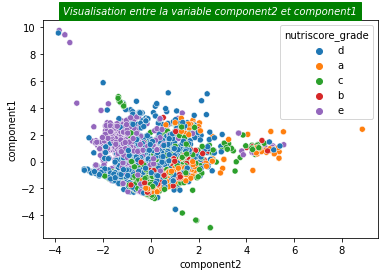

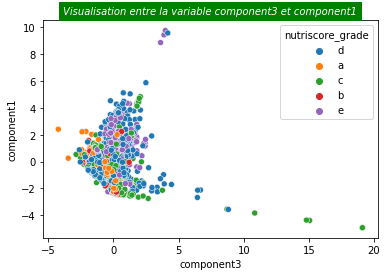

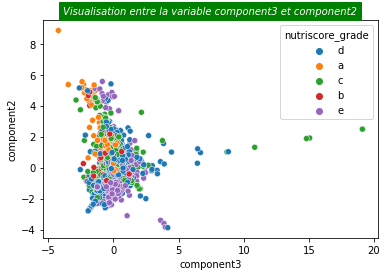

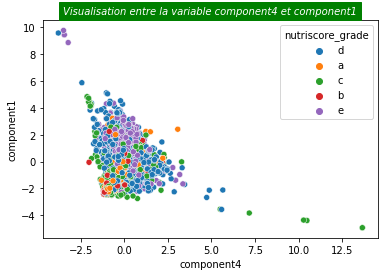

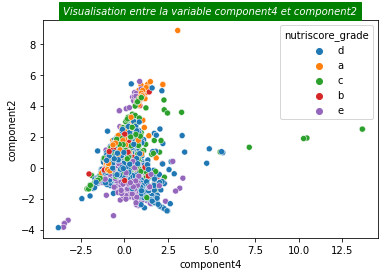

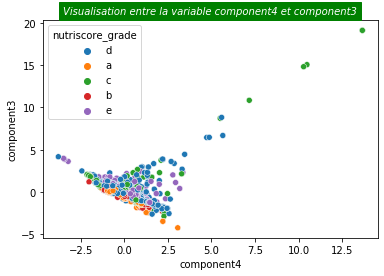

In [156]:
model=PCA(n_components=4)
x_red=model.fit_transform(datan)
x_red=pd.DataFrame(x_red,columns=['component1','component2','component3','component4'])
l=list(x_red.columns)
for  col1 in x_red.columns:
    for col2 in x_red.columns:
       if l.index(col1)>l.index(col2): 
          sns.scatterplot(x=x_red[col1],y=x_red[col2],hue=dataf['nutriscore_grade'],data=x_red)  
          print('\n')  
          plt.title('Visualisation entre la variable {} et {}'.format(col1,col2),color="white", fontstyle='italic',fontsize=10,backgroundcolor='green')  
          print('\n')
          plt.show()      